In [1]:
import pandas as pd
import yfinance as yf

In [10]:
sp500 = yf.Ticker("^GSPC")

In [11]:
sp500 = sp500.history(period = 'max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,0.0,0.0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,0.0,0.0
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,0.0,0.0


In [12]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-04-17 00:00:00-04:00', '2024-04-18 00:00:00-04:00',
               '2024-04-19 00:00:00-04:00', '2024-04-22 00:00:00-04:00',
               '2024-04-23 00:00:00-04:00', '2024-04-24 00:00:00-04:00',
               '2024-04-25 00:00:00-04:00', '2024-04-26 00:00:00-04:00',
               '2024-04-29 00:00:00-04:00', '2024-04-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24198, freq=None)

### Cleaning and Visualizing

In [13]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting up our target for machine learning

In [14]:
sp500['Tomorrow'] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922


In [17]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922,0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1


In [19]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922,0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1


### Training an initial Machine Learning Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
train

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-29 00:00:00-05:00,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,4567.799805,1
2023-11-30 00:00:00-05:00,4554.870117,4569.890137,4537.240234,4567.799805,5399300000,4594.629883,1
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0


In [32]:
test["Target"]

Date
2023-12-06 00:00:00-05:00    1
2023-12-07 00:00:00-05:00    1
2023-12-08 00:00:00-05:00    1
2023-12-11 00:00:00-05:00    1
2023-12-12 00:00:00-05:00    1
                            ..
2024-04-24 00:00:00-04:00    0
2024-04-25 00:00:00-04:00    1
2024-04-26 00:00:00-04:00    1
2024-04-29 00:00:00-04:00    0
2024-04-30 00:00:00-04:00    0
Name: Target, Length: 100, dtype: int32

In [29]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
preds = pd.Series(preds, index = test.index)
preds

Date
2023-12-06 00:00:00-05:00    1
2023-12-07 00:00:00-05:00    0
2023-12-08 00:00:00-05:00    0
2023-12-11 00:00:00-05:00    1
2023-12-12 00:00:00-05:00    1
                            ..
2024-04-24 00:00:00-04:00    0
2024-04-25 00:00:00-04:00    0
2024-04-26 00:00:00-04:00    0
2024-04-29 00:00:00-04:00    0
2024-04-30 00:00:00-04:00    0
Length: 100, dtype: int32

In [31]:
precision_score(test["Target"], preds)

1.0

In [33]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

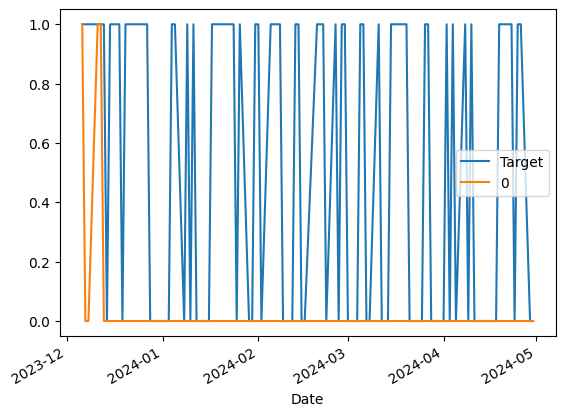

In [35]:
combined.plot()

### Building a backtesting system

In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [41]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [42]:
predictions = backtest(sp500, model, predictors)

In [43]:
predictions["Predictions"].value_counts()

Predictions
0    3552
1    2596
Name: count, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [45]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.53432
0    0.46568
Name: count, dtype: float64

### Adding additional predictors to our model

In [46]:
horizons = [2,5,60,250,1000] # The last 2 days, the last week, the last 3 months, the last year, the last 4 years

In [48]:
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [49]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922,0,1.000106,2.0,1.009033,3.0,0.995752,30.0,1.102869,137.0,1.226735,531.0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1,0.997707,1.0,1.002927,3.0,0.990795,30.0,1.096950,136.0,1.220477,530.0
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1,1.005079,1.0,1.007851,4.0,1.000078,31.0,1.107254,136.0,1.232267,531.0


#### It is NaN because it cannot compute other previous days

In [51]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,5028.850098,5076.120117,5027.959961,5070.549805,3751400000,5071.629883,1,1.005947,2.0,1.010806,2.0,0.996009,30.0,1.103609,136.0,1.227135,531.0
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922,0,1.000106,2.0,1.009033,3.0,0.995752,30.0,1.102869,137.0,1.226735,531.0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1,0.997707,1.0,1.002927,3.0,0.990795,30.0,1.096950,136.0,1.220477,530.0


### Improving our model

In [52]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state=1)

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6]  = 1 # By default it is 0.5
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [54]:
predictions = backtest(sp500, model, new_predictors)

In [55]:
predictions["Predictions"].value_counts()

Predictions
0.0    4313
1.0     834
Name: count, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5731414868105515